In [1]:
## Load the SPARSim R package
library(SPARSim)

## Create the simulation parameter

In [2]:
# Simulate 8 genes
N_gene <- 8

# set gene intensities, gene variabilities and gene names
gene_int <- c( 80,  30,   15,  10,  10,   5,   3,   0)
gene_var <- c(0.05, 0.1,  0.1, 0.2, 0.5, 1.0, 5.0, 1.0)
gene_IDs <- c("Gene_1", "Gene_2" ,"Gene_3", "Gene_4", "Gene_5", "Gene_6", "Gene_7", "Gene_8")

# Number of cells to simulated
N_cell <- 500

# even (medium) sequencing depth
even_lib_size <- rep(100, times = N_cell)
# uneven sequencing detph (random in [20-500])
set.seed(7)
uneven_lib_size <- round(runif (N_cell, min = 20, max = 500))

In [3]:
even_libsize_param <- SPARSim_create_simulation_parameter(
                                                          intensity = gene_int, 
                                                          variability = gene_var,
                                                          library_size = even_lib_size
)


uneven_libsize_param <- SPARSim_create_simulation_parameter(
                                                          intensity = gene_int, 
                                                          variability = gene_var,
                                                          library_size = uneven_lib_size
)

## Simulate with SPARSim

In [4]:
# Simulate count matrix with even sequencing depth
set.seed(8)
sim_results_even_libsize <- SPARSim_simulation(list(even_libsize_param))

Number of experimental conditions:  1 
Number of genes:  8 
Number of cells:  500 
Setting gene expression intensity...  
Setting gene expression variability ...  
Simulating biological variability ...  
Simulating technical variability ...  


In [5]:
# Simulate count matrix with uneven sequencing depth
set.seed(8)
sim_results_uneven_libsize <- SPARSim_simulation(list(uneven_libsize_param))

Number of experimental conditions:  1 
Number of genes:  8 
Number of cells:  500 
Setting gene expression intensity...  
Setting gene expression variability ...  
Simulating biological variability ...  
Simulating technical variability ...  


## Check simulation results

In [6]:
gene_expr <- round(sim_results_even_libsize$gene_matrix)   # simulated gene expression level
count_even <- sim_results_even_libsize$count_matrix        # simulated raw count matrix with even sequencing depth
count_uneven <- sim_results_uneven_libsize$count_matrix    # simulated raw count matrix with uneven sequencing depth

In [17]:
# function to plot the histograms of the simulated genes
plot_histogram <- function(input_matrix, xlabel, color){
  for(gene in rownames(input_matrix)){ # for each gene
    # compute gene sparsity
    gene_sparsity <- round( 100*sum(input_matrix[gene,]==0) / ncol(input_matrix) , 2)
    # plot histogram of raw counts
    hist(input_matrix[gene,], xlim = c(0,max(input_matrix[gene,]*2)), breaks = 20,
         main = paste0(gene,"\n sparsity: ", gene_sparsity," %"), col =  color, xlab = xlabel)
  }
}

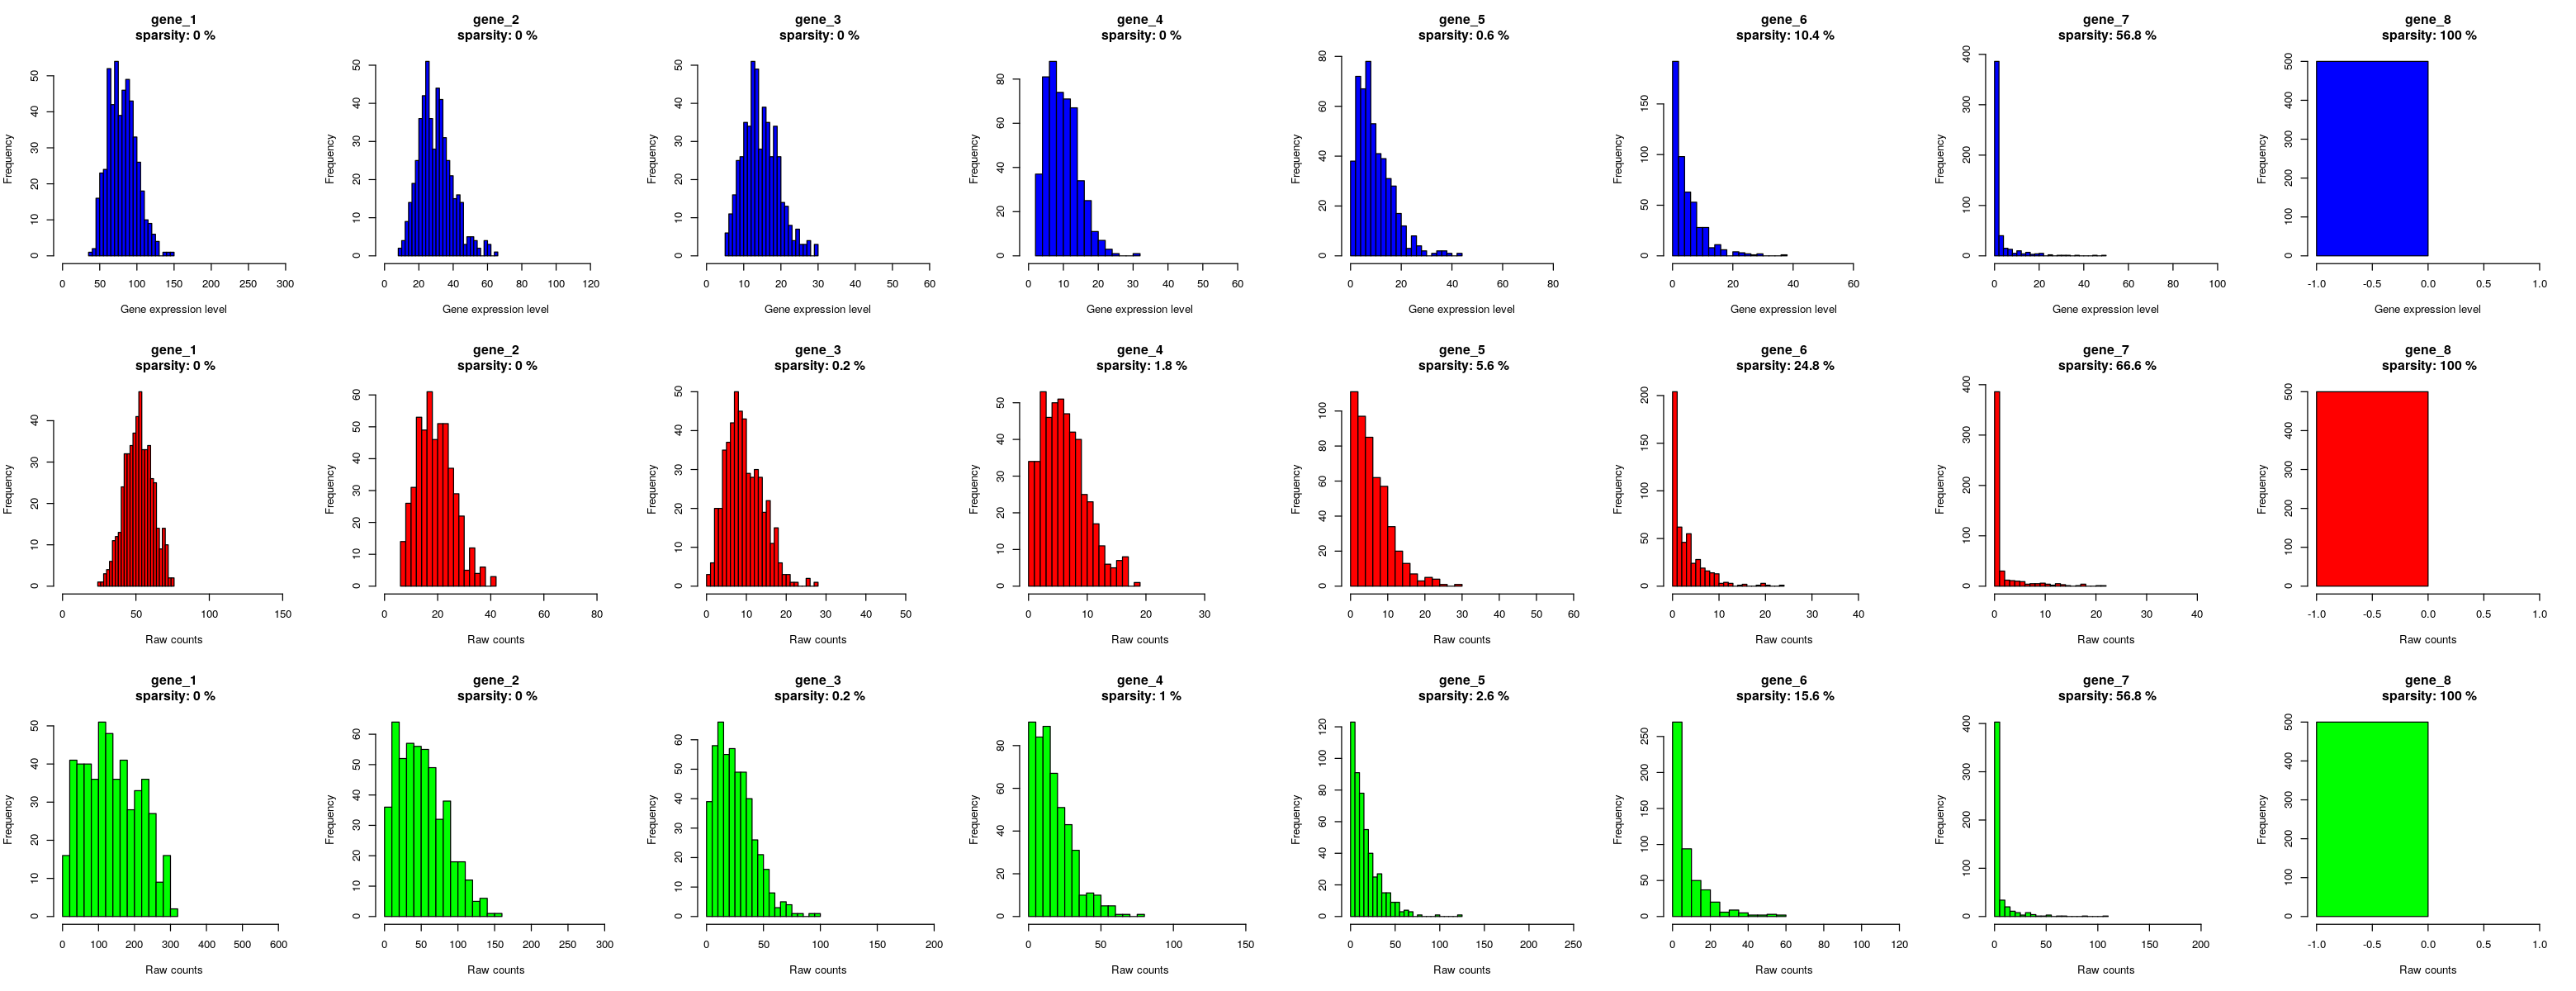

In [18]:
par(mfrow=c(3,8))
options(repr.plot.width=26, repr.plot.height=10) # plot size
plot_histogram(input_matrix = gene_expr,  xlabel = "Gene expression level", color = "blue")   # simulated gene expression level
plot_histogram(input_matrix = count_even, xlabel = "Raw counts", color = "red")               # simulated raw count matrix with even sequencing depth
plot_histogram(input_matrix = count_uneven,  xlabel = "Raw counts", color = "green")          # simulated raw count matrix with uneven sequencing depth

## Preprocess the data (normalization)

In [19]:
# function to implement an simple normalization procedure
simple_normalization <- function(input_matrix){
  count_norm <- t(t(input_matrix)/colSums(input_matrix))*mean(input_matrix)
  return(count_norm)
}

In [19]:
# normalize the count matrix with uneven library size
count_uneven_norm <- simple_normalization(count_uneven)

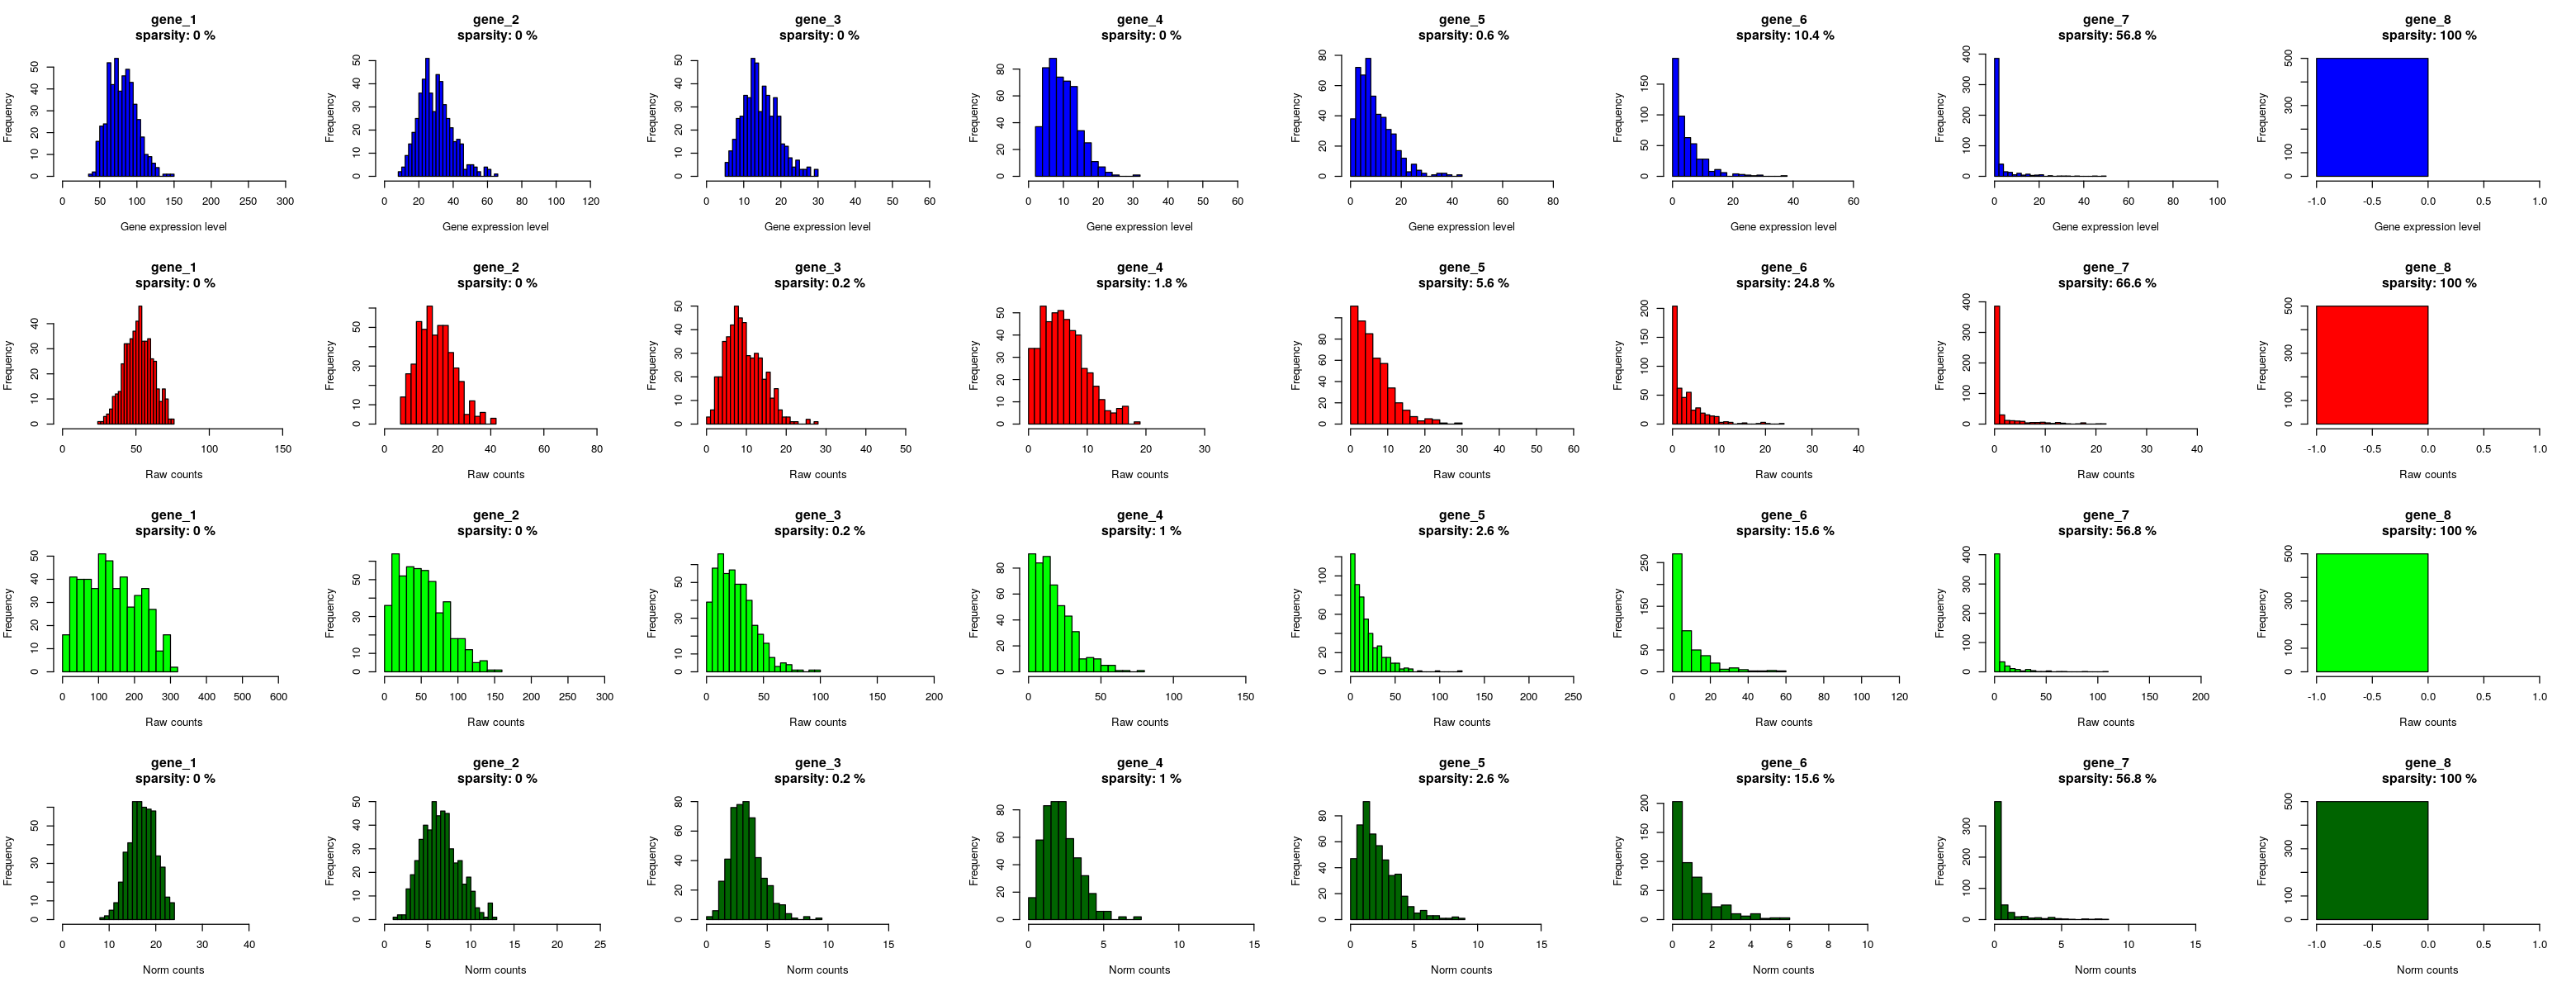

In [20]:
par(mfrow=c(4,8))
plot_histogram(input_matrix = gene_expr,  xlabel = "Gene expression level", color = "blue")     # simulated gene expression level
plot_histogram(input_matrix = count_even, xlabel = "Raw counts", color = "red")                 # simulated raw count matrix with even sequencing depth
plot_histogram(input_matrix = count_uneven,  xlabel = "Raw counts", color = "green")            # simulated raw count matrix with uneven sequencing depth
plot_histogram(input_matrix = count_uneven_norm,  xlabel = "Norm counts", color = "darkgreen")  # simulated PRE-PROCESSED count matrix with uneven sequencing depth